## Exercise sheet 5

Cüneyt Erem
3277992
s6cuerem@uni-bonn.de

Nkeh Victor Ndiwago
3504121
s0vinkeh@uni-bonn.de

Paula Romero Jiménez
3320220
s0parome@uni-bonn.de

--------------------------

### Exercise 1 - Clustering Algorithms (15 points)

#### 1)) k-means (5P)

a. What are the advantages of k-means? (1P)

- it is simple to implement
- it has high speed
- it guarantes convergence
- it scales large datasets
- new examples can easily be adapted

b. Limitations of k-means

i. How can you counteract that k-means depends on the initial conditions? (1P)

- there is no guarantee to find an optimal solution to select initial centroids because it is np hard problem. 
  
- in practical way, it can be solved by k-means++ or teoritically it can be solved by randomly initialize cluster centers and repeat many times, then keep the best one.

ii. Why is k-means not optimal if you have class overlap? (1P)

- complexity of the algorithm is O(samples * k * variables * iterations). In each iteration,  cluster borders and centroids are defined, yet final clusters are computed. If overlap is occured, then specific data points cannot be attached to the specific cluster (if point's distance is equally distant to different clusters), then algorithm may not find optimal result and speed will decrease. Therefore it may not be optimal solution

iii. Consider this dataset. Why would k-means have problems detecting the classes? (1P)

- in this example, mean values of the clusters are very close to each other in non-spherical data. Because of the problem computing distances wrong, k-means is better to detect spherical clusters

- example: take k = 2, k-means divides two clusters as line; half of the cluster as left side of the blue and red points, other half as right side of the blue and red points. (however, 2 different clusters has to be only red and blue clusters seperately) So it divides clusters in a wrong way. 

iv. Consider this dataset. Why would k-means have problems detecting the classes?
Which other algorithm would be better to use in this case? (1P)

- Unfortuanately, k-means is sensitive for the outliers in which gives wrong clusters in the example. There are two clusters on left and outliers should have been detected as noise, however selecting random initial clusters and computing means give wrong result. 

- k-medians can be another solution so that outliers can be considered as noise or better algorithm can be GMM or DBSCAN directly considers outliers as noise. 

#### 2)) GMM – Gaussian Mixture Models for Classification (6P)

a. Explain the EM-Algorithm in your own words, without using any formula. (1P)

- EM algorithm is an iterative algo that finds local maximum likelihhod estimates of parameters and convergence by applying E and M steps that depends on unobserved variables.

- Unlike hard clustering like k-means, EM-algorithm is soft clustering that clusters can overlap and there is an association between clusters and instances. 

- start with randomly (or k-means) placed gaussian clusters
- (e-step) expected value of log: for each point P(b|x_i), does point look like come from b
- (m-step) maximize Q value: adjust gaussians to fit points assigned to them
- iterate until convergence

- note: it can stuck in local optima

b. Describe how to avoid the problem of getting stuck in local minima when using the EM algorithm. Write a pseudo-algorithm (no coding needed) to describe how to find the best set of clusters AND to reduce the local minima problem. (1P)


to avoid local minima problem, we can apply;
- random initilization for starting points
- run multiple iterations for new starting points

EM algorithm;
- start with randomly (or k-means) placed gaussian clusters
- (e-step) expected value of log: for each point P(b|x_i), does point look like come from b
- (m-step) maximize Q value: adjust gaussians to fit points assigned to them
- iterate until convergence

c. The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has p features and you want to cluster it into k clusters. (3 points)

i. How many parameters (depending on the number of clusters) need to be
estimated in the most general model (no restrictions on the covariances)? (1P)

- symmetric DxD covariance matrix gives (D*D - D)/2 (off-diagonal) + D (diagonal) parameters
- $\mu$ mean vector gives D parameters
- $\pi$ weight factor gives 1 parameter
  
- for each gaussian; Df = (D*D - D)/2 + D + D + 1 
- for K components, find K-1 item; we have (K*Df)-1 parameters in total

ii. Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate? (1P)

- no correlation means no off-diagonal elements

- for each gaussian; Df = D + D + 1 

- for K components, find K-1 item; we have (K*Df)-1 parameters in total

iii. Assuming that there is neither correlation nor does the variation for each
feature change. How many parameters does the model have to estimate now? (1P)

- no correlation and no variation means no need for vector parameters
  
- for each gaussian; Df = 1 + 1 + 1

- for K components, find K-1 item; we have (K*Df)-1 parameters in total

iv. Answer 3a-3c with p=3, k=2. (1P)

i. 

Df = (3*3 - 3)/2 + 3 + 3 + 1 = 10

(2*10)-1 = 19 parameters in total

ii. 

Df = 3 + 3 + 1 = 7 

(2*7)-1 = 13 parameters in total

iii. 

Df =  1 + 1 + 1 = 3 

(2*3)-1 = 5 parameters in total

------------------------------

**_3. Consensus Clustering and Non-Negative Matrix Factorization (4P)_**

**a. Consensus clustering is used to address statistical instability in clustering. Briefly explain in
your own words the steps of implementing consensus clustering to a dataset using any
clustering method, and how does it address statistical instability in clustering. (1P)**

In consensus clustering we perform iterations of the clustering method on sub-samples of the dataset. 

First, we need to decide the clustering method we are going to use. Then, the number of iterations and the set of values (sub-samples) that are going to be tested. For each set, we will iterate the number of times we have chosen and we will have then a set of clusters. 

After, we want to obtain the consensus matrix, we do so by looking at the pairwise relationship between each feature we are clustering. We create a consensus matrix for each set of values and we choose the one that gives the nicest distribution.

This method addresses the problem of instability simply adding sampling variability. Performing the clustering method in sub-samples is going to stabilize the clusters and the parameter decisions. 

**b. What is the main constraint of applying non-negative matrix factorization (NMF) as a
clustering technique? How does the algorithm work in clustering data? (1P)**

The main constraint of NMF, as its name shows, is that all factor matrices must be non-negative, so all elements should be equal to or greater than zero.

This algorithm works factoring a matrix V into two smaller matrices W and H: V = WH, that is also achieved by finding the W and H that minimize the error function.

**c. What are the advantages and drawbacks of NMF? (1P)**

Advantages:
- It is not based on the distance.
- We can perform a "bi-clustering", the selection of features and clustering is done at the same time.

Drawbacks:
- It is computationally demanding.
- It can't be applied to negative data.
- It can only detect linearly separable clusters.


**d. How does one choose the appropriate number of clusters for a model based on silhouette
index? (1P)**

In a silhoutte plot we are going to see the silhoutte of each cluster and a silhoutte index. 

The silhoutte index value varies from (-1,1). A score of 1 means that the data point is very compact within the cluster to which it belongs and far away from the other clusters. If we have values around 0, we would have overlapping clusters. And values near -1 denote the worst clustering.

### Exercise 2 - Programming task (10 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.spatial import distance

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['Species'] = iris['target']

# print the target names
print(iris['target_names'])

# replace the clssifications with the target names
df.replace({'Species': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}, inplace=True)

df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. Apply k-means clustering to the iris dataset. (3P)

**a. Select the optimal number of clusters via BIC.**

In [4]:
from sklearn.preprocessing import StandardScaler

X = np.array(iris.data) # extract only the features
Xs = StandardScaler().fit_transform(X)
Y = iris.target

In [5]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) - n[i] * np.log(N) - ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) - ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

In [6]:
ks = range(1,6)

# run 9 times kmeans and save each result in the KMeans object
result = [KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in result]

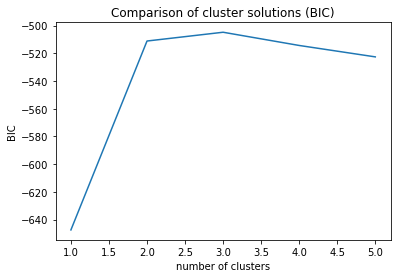

In [7]:
plt.plot(ks, BIC)
plt.xlabel('number of clusters')
plt.ylabel('BIC')
plt.title('Comparison of cluster solutions (BIC)')
plt.show()

As expected for the iris dataset, we get that the optimal number of clusters is going to be 3.

**b. For each clustering plot the cluster assignment within a scatter plot for the features
“petal width” and “petal length”.**

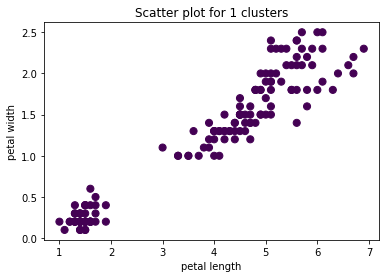

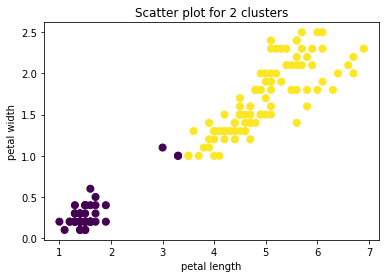

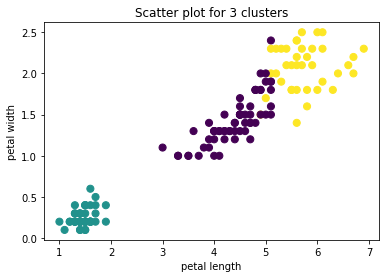

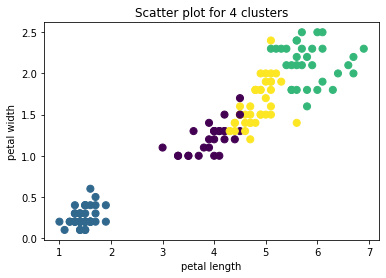

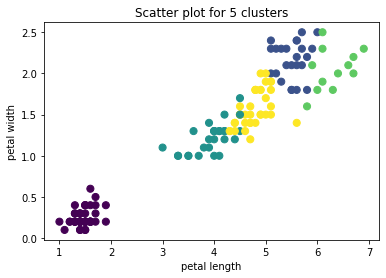

In [8]:
for i in ks:
    labels = KMeans(i, random_state=0).fit_predict(X)
    plt.scatter(X[:, 2], X[:, 3], c=labels, s=50, cmap='viridis');
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title(f'Scatter plot for {i} clusters')
    
    plt.show()

**c. For each clustering create silhouette plots and print out the score. You can make use of the sklearn library**

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728737
For n_clusters = 5 The average silhouette_score is : 0.4887488870931056


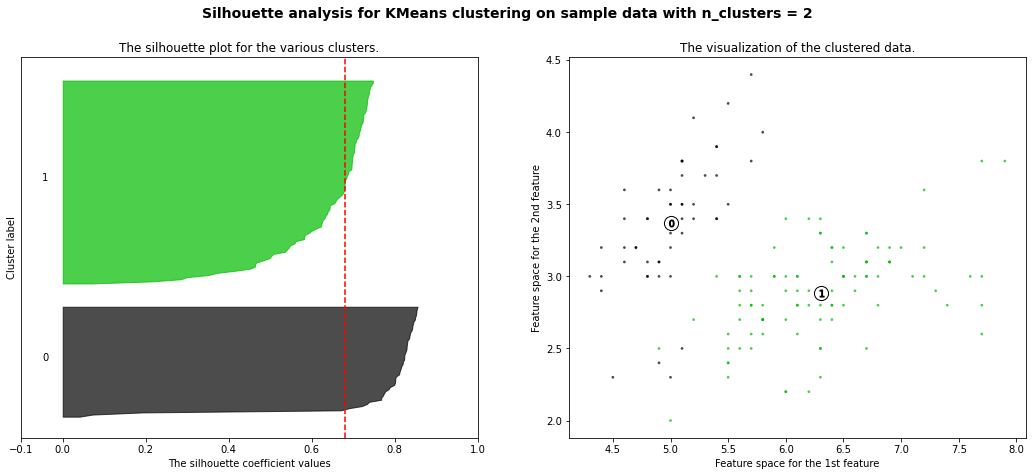

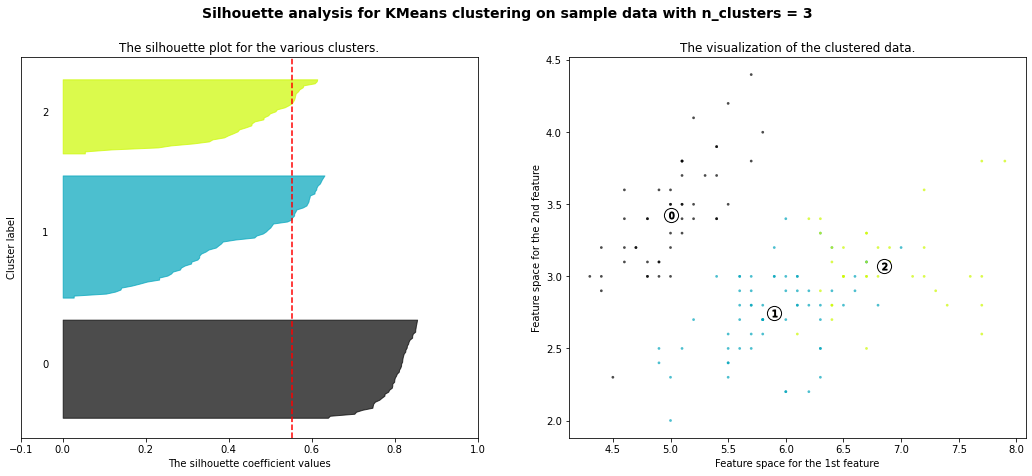

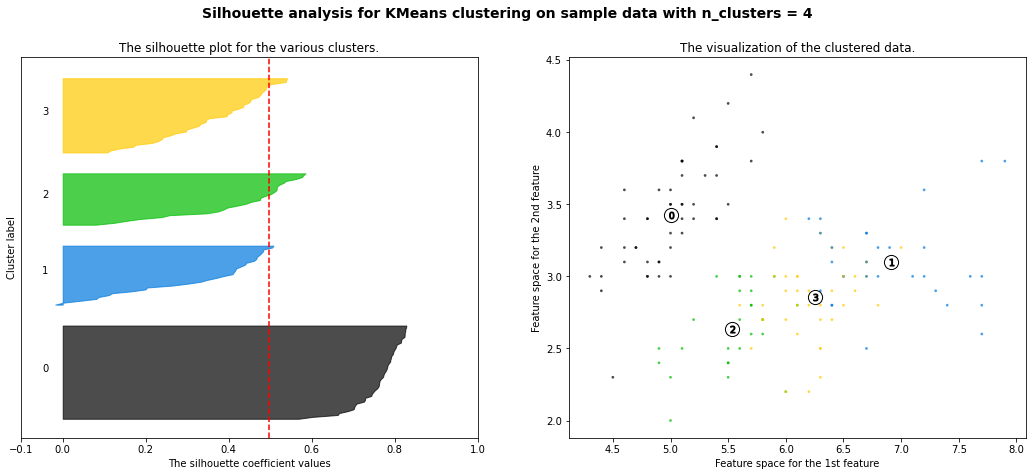

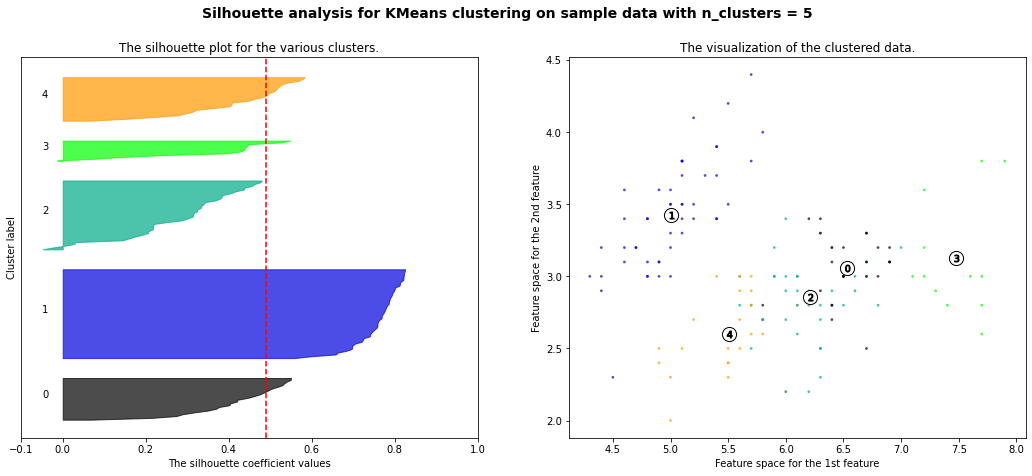

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# For reproducibility
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhoutte plots show that deciding for 3 clusters is a better option because all the clusters are above the score and they are more or less the same thickness.

------------------------------

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


In [11]:
#Loading the Iris data set
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [35]:
# split data into features (X) and labels (y)

X = iris.data[:, :3]
y = iris.target
# Feature Scaling
scaler = StandardScaler()

scaler.fit(X)

X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array)
# Training and Testing Data for Dimensionality Testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2)
# x values attributed to features for ease of borrowing code
features = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

AttributeError: iloc

2. Apply GMM clustering to the iris dataset. (3P)

a. Select the optimal number of clusters via BIC.

Choose k= 2


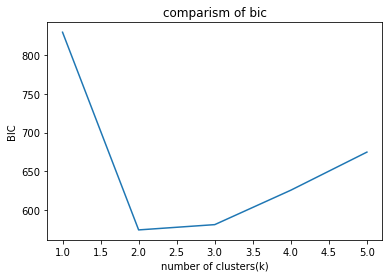

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y_iris = iris.target

bic = list()
#print(X)

ks = np.arange(1, 6)

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))

k_chosen = ks[np.argmin(bic)]

plt.plot(ks, bic)
plt.xlabel("number of clusters(k)")
plt.ylabel("BIC")
plt.title("comparism of bic")
print("Choose k=", k_chosen)

b. For each clustering plot the cluster assignment within a scatter plot for the features 
“petal width” and “petal length”.

NameError: name 'features' is not defined

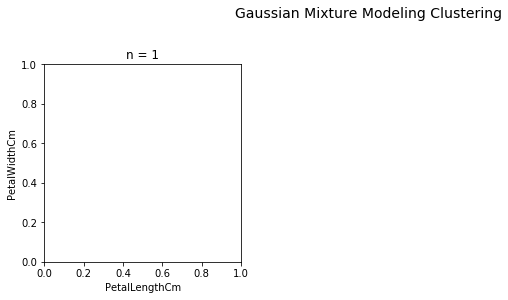

In [29]:
plt.figure(figsize=(12,8))

plt.tight_layout()
plt.suptitle("Gaussian Mixture Modeling Clustering",fontsize=14)


plt.subplot(2,3,1)
plt.title("n = 1",fontsize=12)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

plt.subplot(2,3,2)
plt.title("n = 2",fontsize=12)
plt.xlabel("PetalLengthCm")
gmm = GaussianMixture(n_components=2)
features["labels"] = gmm.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(2,3,3)
plt.title("n = 3",fontsize=12)
plt.xlabel("PetalLengthCm")
gmm = GaussianMixture(n_components=3)
features["labels"] = gmm.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(2,3,4)
plt.title("n = 4",fontsize=12)
plt.ylabel("PetalWidthCm")
plt.xlabel("PetalLengthCm")
gmm = GaussianMixture(n_components=4)
features["labels"] = gmm.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(2,3,5)
plt.title("n = 5",fontsize=12)
plt.xlabel("PetalLengthCm")
gmm = GaussianMixture(n_components=5)
features["labels"] = gmm.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(2,3,6)
plt.title("Original Labels",fontsize=12)
plt.xlabel("PetalLengthCm")
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-setosa"],iris.PetalWidthCm[iris.Species == "Iris-setosa"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-versicolor"],iris.PetalWidthCm[iris.Species == "Iris-versicolor"])
plt.scatter(iris.PetalLengthCm[iris.Species == "Iris-virginica"],iris.PetalWidthCm[iris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.9)
plt.show()

c. For each clustering create silhouette plots and print out the score. You can make use 
of the sklearn library (https://scikitlearn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). 

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235


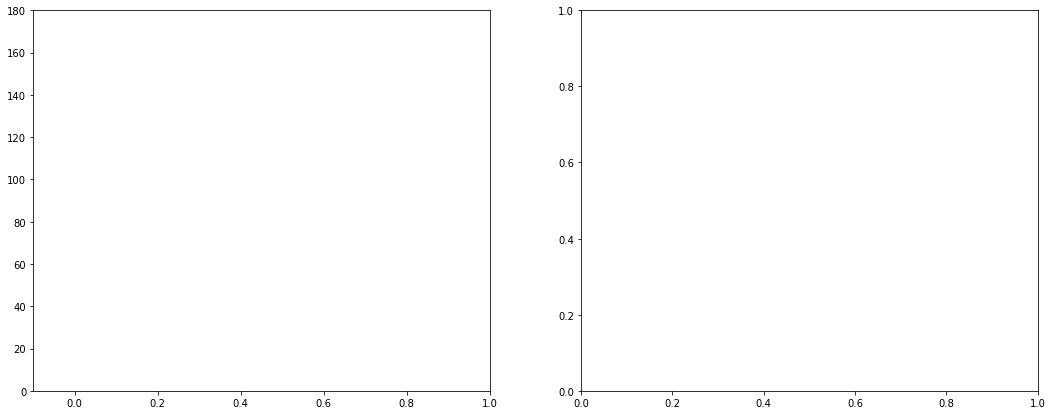

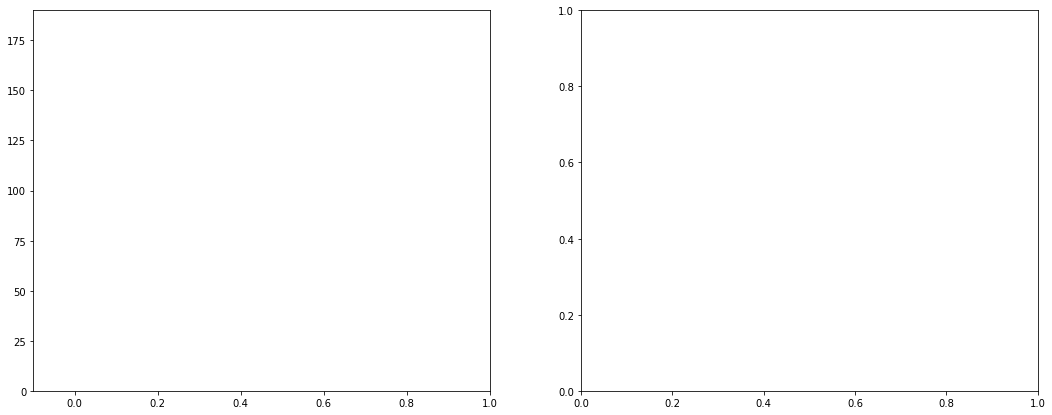

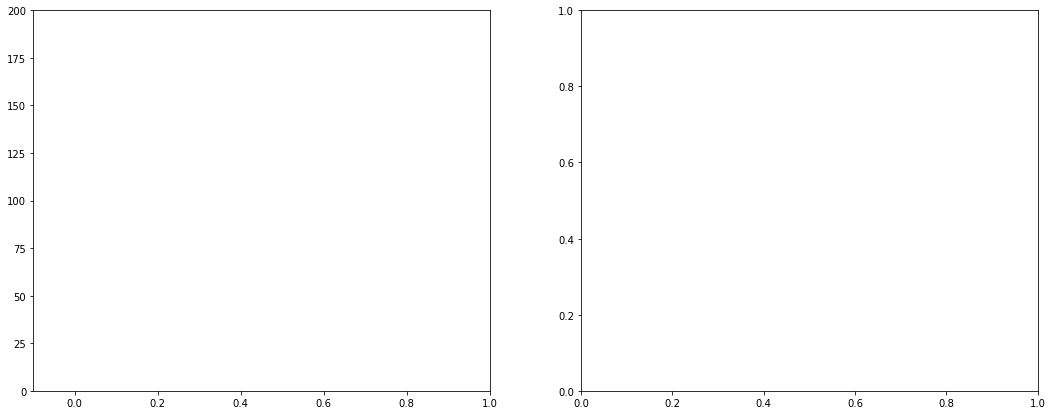

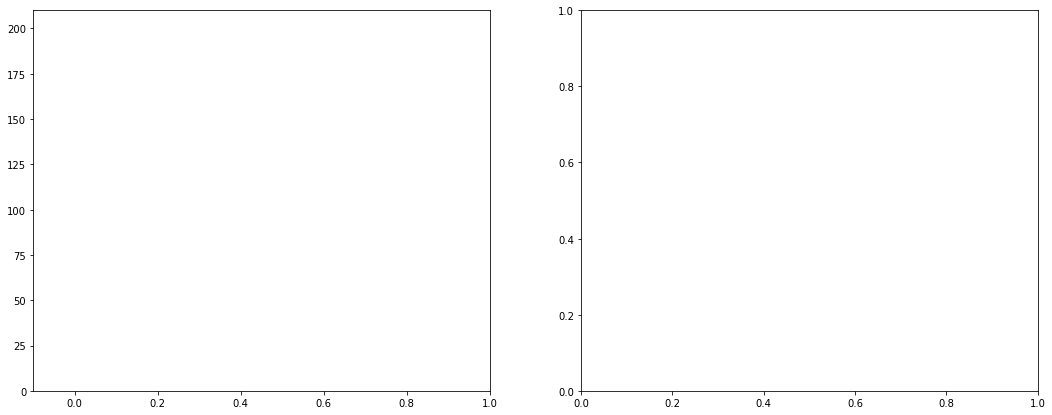

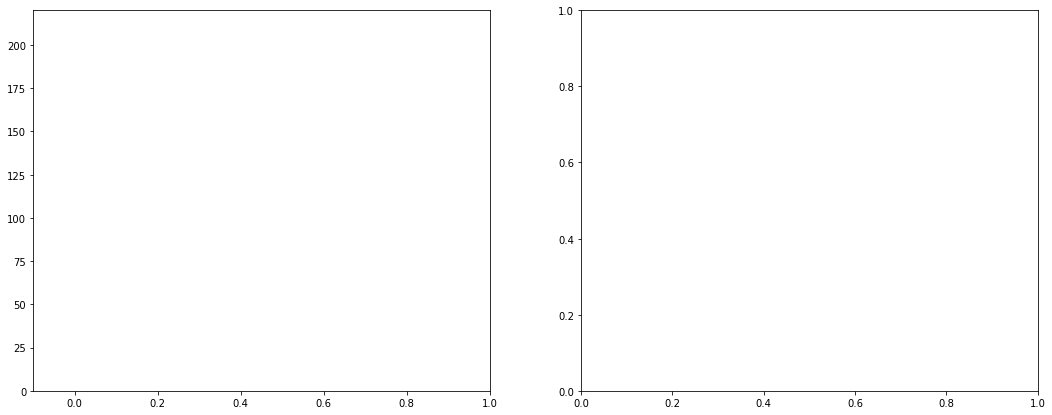

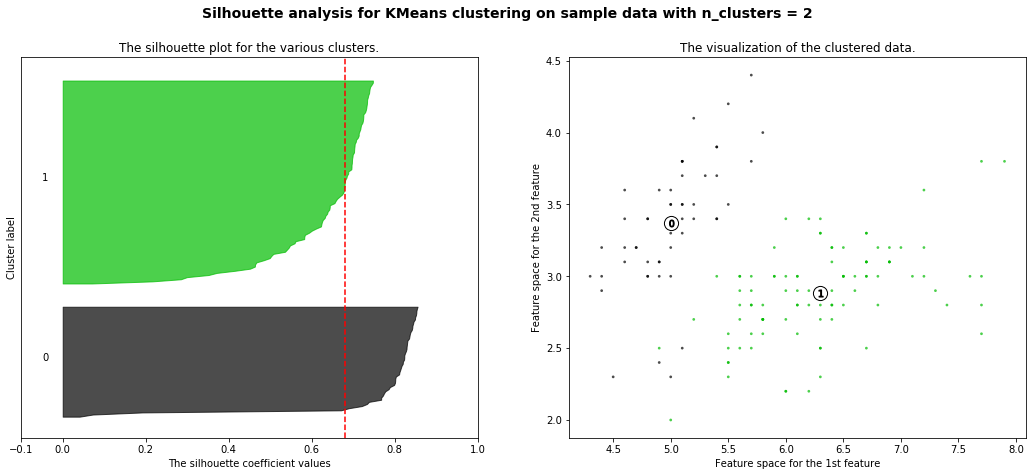

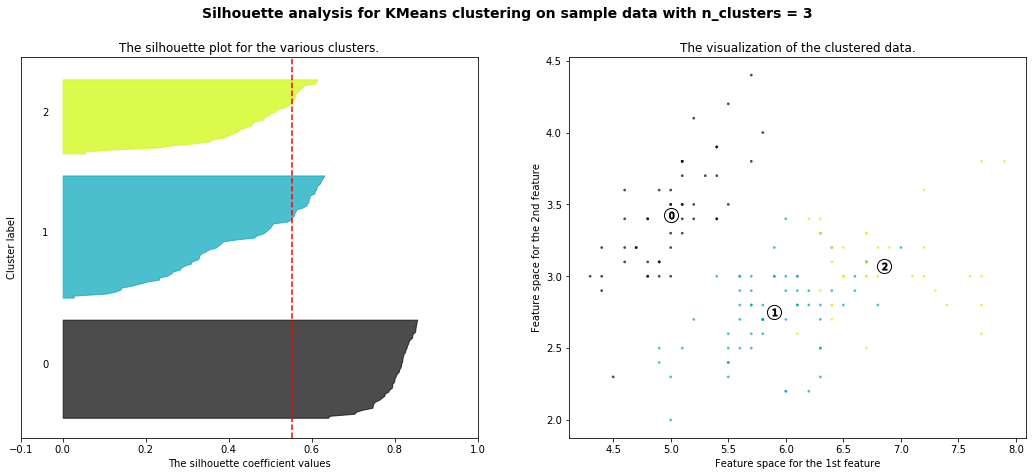

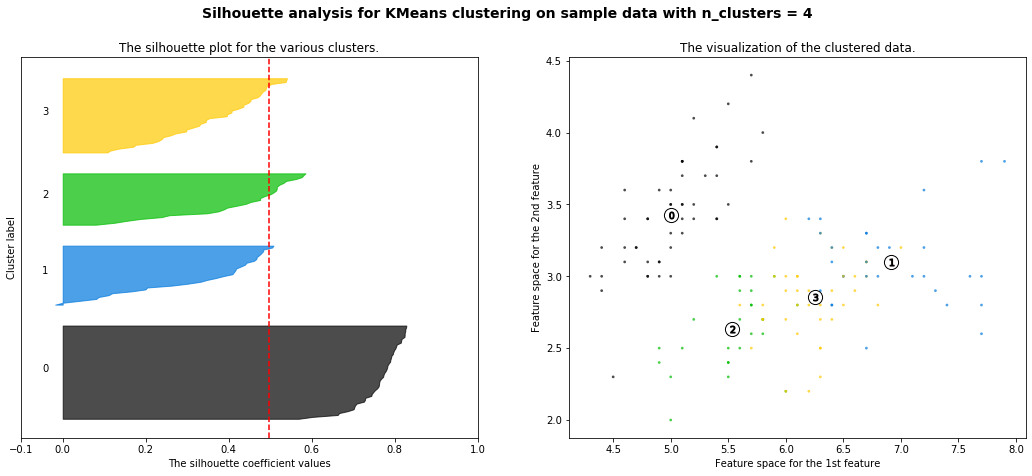

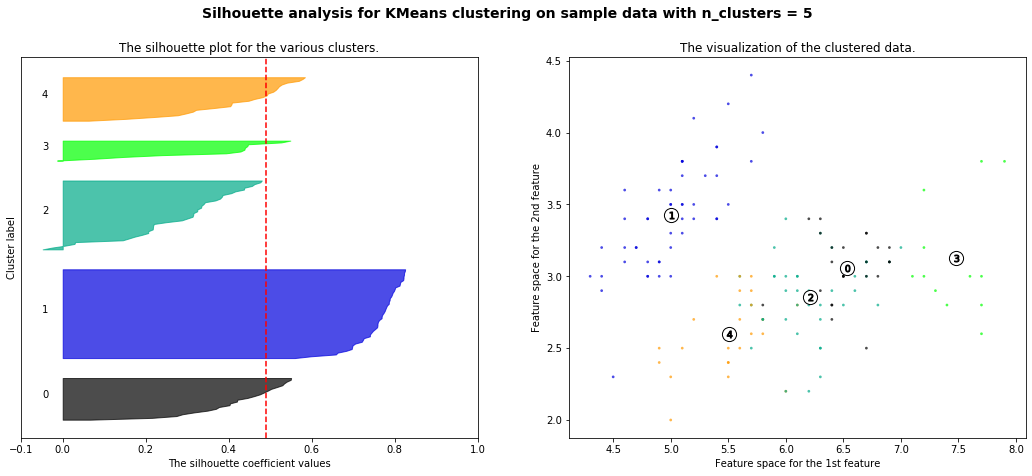

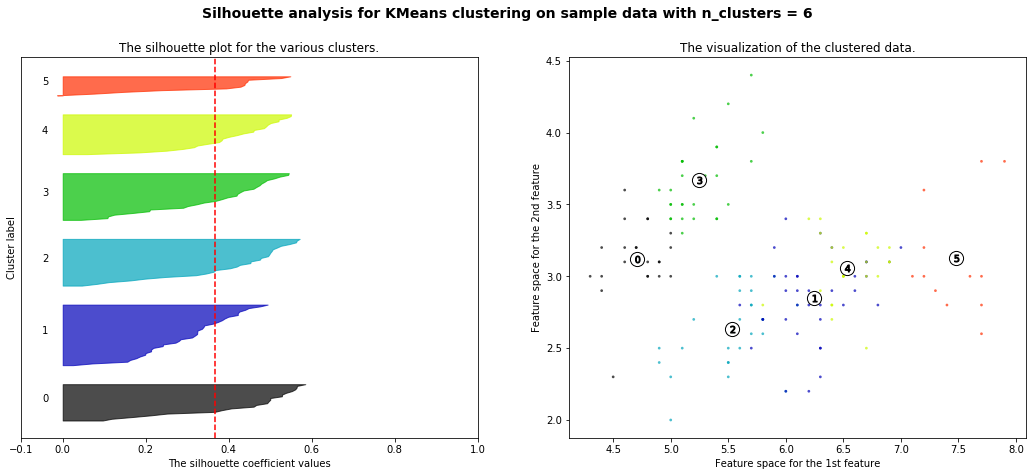

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
 # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
     # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


4. Perform consensus clustering on the Iris dataset using the functions of the consensusClustering.py file 
available at this repo: https://github.com/ZigaSajovic/Consensus_Clustering. Initialize it with parameters: 
cluster = Kmeans, number of clusters = 2 to 10, number of iterations = 5, and resample proportion = 80%. 
Find out from consensus clustering: the number of clusters that is found to be best for the dataset, 
changes in areas under CDF, and the best cluster from the consensus matrix assigned to each sample. 